<a href="https://colab.research.google.com/github/rohanailoni/Tech_week/blob/main/EXP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### Now After Naive Bayers Lets us get into World of Lstm Where we will be Exploring Bi direction Lstm for Training the data.

In This Expiriment we will also be Using Official Stanford Glove Data Set for Converting the Normal Stentences into Word Vectors.

First but not the least we needed to import the modules into the Main frame so that we will not get any Errors while Training the model

Lets First Declare Varibale :-
MAX_NB_WORDS. -This variable determined the max number of words used for tokenizer
MAX_SEQUENCE_LENGTH this variable determined max length of the text Including Padding

Validation SPlit:- This is for Spliting the testing dataset into parts to check the loss of the model after training

EMBEDDING_DIM:- After extracting Glove from Stanford we will having a Embedding Dimention to which the Word are feeded





In [1]:
MAX_NB_WORDS = 56000 # max no. of words for tokenizer
MAX_SEQUENCE_LENGTH = 30 # max length of text (words) including padding
VALIDATION_SPLIT = 0.2
EMBEDDING_DIM = 200 # embedding dimensions for word vectors (word2vec/GloVe)
GLOVE_DIR = "glove.twitter.27B.200d.txt"
print("Loaded Parameters:\n", MAX_NB_WORDS,MAX_SEQUENCE_LENGTH+5, VALIDATION_SPLIT,EMBEDDING_DIM,"\n", GLOVE_DIR)

Loaded Parameters:
 56000 35 0.2 200 
 glove.twitter.27B.200d.txt


In [2]:
import numpy as np
import pandas as pd
import re, sys, os, csv, keras, pickle

In [3]:
from keras import regularizers, initializers, optimizers, callbacks
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Embedding
from keras.layers import Dense, Input, Flatten, Concatenate
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout, LSTM, GRU, Bidirectional
from keras.models import Model
from keras import backend as K
from tensorflow.keras.layers import Layer, InputSpec
from tensorflow.keras.callbacks import ModelCheckpoint
print("Using Keras version",keras.__version__)

Using Keras version 2.7.0


In [ ]:
#clone the dataset from the Repo
url = 'https://raw.githubusercontent.com/rohanailoni/Tech_week/master/cleaned_data/emotion_data_prep.csv'
!wget $url

In [ ]:
#cloning pickle file from the Repo
url1='https://raw.githubusercontent.com/rohanailoni/Tech_week/master/tokenizer.pickle'
!wget $url1

**After importing and Declaring all the essential Variable Now we will be Loading our cleaned Data into 2 Python Objects Where Text array contains the text and Labels contains the label for it**

* texts ------ array contains all the words
* labels ------ array contains all the classed for above text respectivly


In [7]:
path_1="/content/emotion_data_prep.csv"
#readint content from the CSV file
#code


Reading from csv file...
Done!


**Now we will import the Tokenizer that is already trained for large set of data so that it can accurrly pull Tokenizer funciton for Pickel file**

In [8]:
path_2="/content/tokenizer.pickle"
with open(path_2, 'rb') as handle:
    tokenizer = pickle.load(handle)

*Now We use Tokenizer.text_to_sequences to convert all the array of text into series of numbers and it takes the Freqency of the words as the input*

# Padding
**Before directly Using the tokenized sentences into the array we will be using Padding where we will take a array of number and add Zeros in the front and Zeros at the end to match The MaxSequece Length**

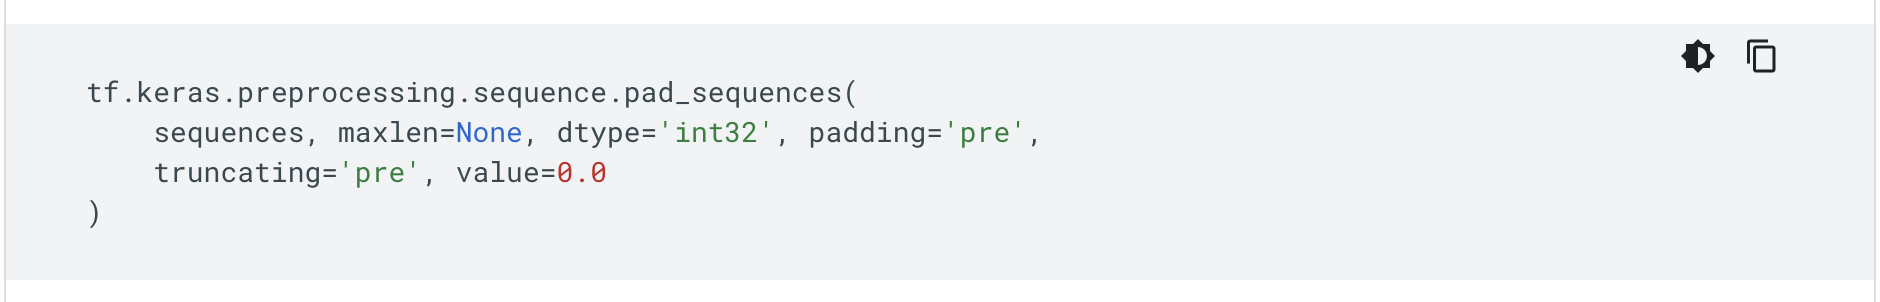


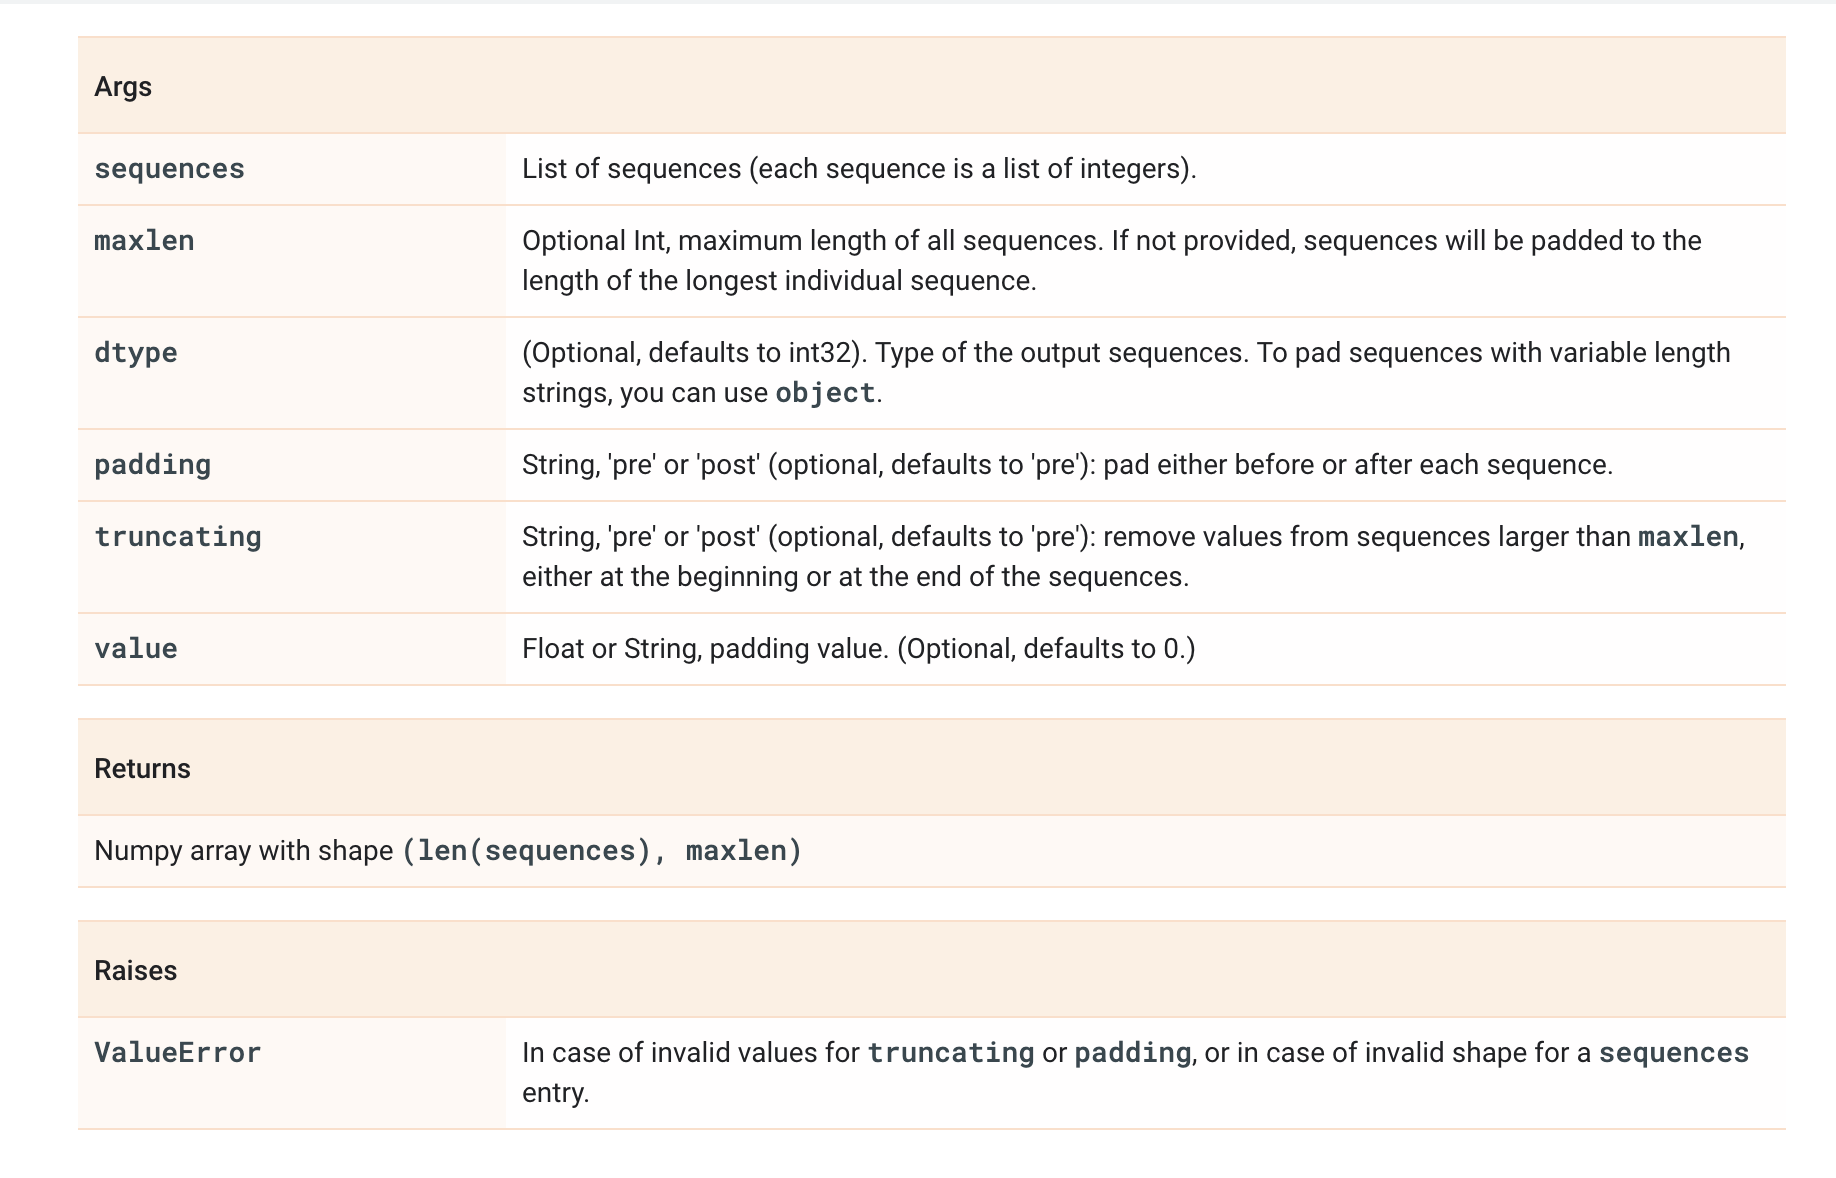

**From the official Tensorflow Documentation pad_sequeces Gives us Option of Truncating Zeros at the end and the Start**

In [ ]:
#padding the data


Found 34359 unique tokens.


**Now the simple label will be a One dimentiona array**
**ex:['1','2','3','4','2','5']**
**Now we will convert the above sentences into One hot Encoding**
**One dimentional Array  ----------> 2-Dimentional Array of columns of Length 5*
*

In [ ]:
labels = to_categorical(np.asarray(labels)) # convert to one-hot encoding vectors
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (62015, 30)
Shape of label tensor: (62015, 5)


In [ ]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

 **Now we split our data into 2 parts**
 * Training Dataset -x_train_y_train
 * Validation Dataset -x_val,y_val
 

In [ ]:
x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

print('Number of entries in each category:-')
print("Training:\n",y_train.sum(axis=0))
print("Validation:\n",y_val.sum(axis=0))

Number of entries in each category:-
Training:
 [ 7748. 17623. 11880.  7051.  5310.]
Validation:
 [1895. 4398. 2964. 1751. 1395.]


**Now using Wget we will pull glove.twitter.27B.zip file which contains Is a trained Data from Twitter Contains 4 type of Text files 200d,100d,50d,25d where it Represnts the length of the Vector for Each word**


In [ ]:


!wget http://nlp.stanford.edu/data/glove.twitter.27B.zip


mkdir: cannot create directory ‘data/glove’: No such file or directory
mkdir: cannot create directory ‘data/glove_twitter’: No such file or directory
--2021-11-21 07:19:49--  http://nlp.stanford.edu/data/glove.twitter.27B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.twitter.27B.zip [following]
--2021-11-21 07:19:49--  https://nlp.stanford.edu/data/glove.twitter.27B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip [following]
--2021-11-21 07:19:49--  http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.s

**Extracting the Zip File using Unzip**

In [ ]:
!unzip "/content/glove.twitter.27B.zip.1" 


Archive:  /content/glove.twitter.27B.zip.1
  inflating: glove.twitter.27B.25d.txt  
  inflating: glove.twitter.27B.50d.txt  
  inflating: glove.twitter.27B.100d.txt  
  inflating: glove.twitter.27B.200d.txt  


**In the Text file each Line Contains one Word and Remaining Line with Vector with spaces After extrating and Soring the values in the embeddings_index we will create and Embedding Matrix where each row is the Glove vector of the word**

In [ ]:
import numpy as np
embeddings_index = {}
f = open("/content/glove.twitter.27B.200d.txt", encoding="utf8")
print("Loading GloVe...")
for line in f:
    values = line.split()
    word = values[0]
    embeddings_index[word] = np.asarray(values[1:], dtype='float32')
f.close()
print("Done.\nProceeding with Embedding Matrix...", end="")
embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
print("\nCompleted!")

Loading GloVe...
Done.
Proceeding with Embedding Matrix...
Completed!


***

**After even taking Trained Dataset we will be having some disfunction in the words some words will not be even found int Glove so for the we will create a matix which contains all the zeros for non found words**


In [ ]:
embedding_matrix_ns = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix_ns[i] = embedding_vector
print("Completed!")

Completed!


In [ ]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

# static channel


# non-static channel


In [ ]:
#first round of layers
l_lstm1f = Bidirectional(LSTM(6,return_sequences=True,dropout=0.3, recurrent_dropout=0.0))(embedded_sequences_frozen)
l_lstm1t = Bidirectional(LSTM(6,return_sequences=True,dropout=0.3, recurrent_dropout=0.0))(embedded_sequences_train)
l_lstm1 = Concatenate(axis=1)([l_lstm1f, l_lstm1t])

In [ ]:
#second round of layers

#addiing the layers
conv_1 = [l_conv_6,l_conv_5, l_conv_8,l_conv_2,l_conv_3]

l_lstm_c = Concatenate(axis=1)(conv_1)

In [ ]:
#third Round of layers

#adding the layers
conv_2 = [l_conv_4f, l_conv_4t,l_conv_3f, l_conv_3t, l_conv_2f, l_conv_2t]

l_merge_2 = Concatenate(axis=1)(conv_2)
l_c_lstm = Bidirectional(LSTM(12,return_sequences=True,dropout=0.3, recurrent_dropout=0.0))(l_merge_2)

In [ ]:
#fourth Round of layers
l_merge = Concatenate(axis=1)([l_lstm_c, l_c_lstm])
l_pool = MaxPooling1D(4)(l_merge)
l_drop = Dropout(0.5)(l_pool)
l_flat = Flatten()(l_drop)
l_dense = Dense(26, activation='relu')(l_flat)
preds = Dense(5, activation='softmax')(l_dense)

In [ ]:
import tensorflow as tf
model = Model(sequence_input, preds)
adadelta = tf.keras.optimizers.Adadelta(lr=0.9, rho=0.95, epsilon=None, decay=0.002)
# lr_metric = get_lr_metric(adadelta)
model.compile(loss='categorical_crossentropy', optimizer=adadelta, metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adadelta.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adadelta, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 30)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 30, 200)      6872000     ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 30, 200)      6872000     ['input_1[0][0]']                
                                                                                                  
 bidirectional (Bidirectional)  (None, 30, 12)       9936        ['embedding[0][0]']              
                                                                                            

In [ ]:
def initial_boost(epoch):
    if epoch==0: return float(8.0)
    elif epoch==1: return float(4.0)
    elif epoch==2: return float(2.0)
    elif epoch==3: return float(1.5)
    else: return float(1.0)

In [ ]:
model_checkpoints = ModelCheckpoint("Checkpoint-{val_acc:.4f}.h5", monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=0)
lr_schedule = callbacks.LearningRateScheduler(initial_boost)

In [ ]:
model_log = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=3, batch_size=110, callbacks=[model_checkpoints])

Epoch 1/3
452/452 [==============================] - 163s 331ms/step - loss: 1.2235 - acc: 0.4908 - val_loss: 1.0926 - val_acc: 0.5672
Epoch 2/3
452/452 [==============================] - 146s 323ms/step - loss: 1.0444 - acc: 0.5795 - val_loss: 1.0048 - val_acc: 0.6020
Epoch 3/3
452/452 [==============================] - 146s 324ms/step - loss: 1.0063 - acc: 0.5960 - val_loss: 1.0040 - val_acc: 0.5974


In [ ]:
#ploting the model

In [ ]:
# testing with some examples


2

In [ ]:

text = ["For instance, giving a kiss to your younger sibling daily after waking up in the morning and showing him how much you love them. For some happiness means loving life and seeing others happy. While some finds happiness in writing stories. Some conquer happiness in being simple yet the best person they can ever be. Everyone has their own unique way to feel happy by finding things that they never expected to find.", # happy
        "Love is the key to happiness. We all want to lead a happy life. People look around for happiness in power, fashion, wealth, drugs etc. But these things can only give temporary pleasures. The power of love can create miracles. Love can create unity among nations and its citizens. Love is the most beautiful feeling in the world. Love has given different meaning by different people depending upon how they have experienced this wonderful feeling.", # love
        "One day I was studying in my room when, all of a sudden, i heard hot words being exchanged between two persons in the street. I paid no attention, thinking it would be a minor quarrel but soon I heard the voices of a large number of people. I peeped from the window and saw that there was a street quarrel. I went downstairs and reached the spot in the twinkling of an eyes. I was at my wits end on seeing that both of them had come to blows. The people were standing around them and enjoying their quarrel but none tried to pacify them.", # sad
        "I am so angry at you!!!!!", # anger
        "you ve hit a new low with a danger of blm fascist slogan please stop it before too late stop", # anger
        "I love my doggg", # love
        "I think i'm gonna be sick :'‑(", # sad
        "I hate you so much", # anger
        "I'm at work", # neutral
        "@TheTombert i was watching Harpers Island, lol... there was no vodka involved", # neutral
        "sometimes i wish things could go back to the way they were the beginning of last summer", # sad
        "it's your 18th birthday finally!!! yippeeeee", # happy
        "still waiting in line", # neutral
        "aarrgghh - fu*k.....a hose has leaked water all over the new floating floor", # anger
        "that b*tch is so ugly", # anger
        "oh no he is hospitalised!!!", # sad,
        "I am so fucked right now",
       ]

In [ ]:
#testing
